# Sentiment Analysis on Movie Reviews

## Background information:
The dataset is from Rotten Tomatoes dataset consist of audience reviews and sentiments. 

The sentiment labels are: \
0 - negative \
1 - somewhat negative \
2 - neutral \
3 - somewhat positive \
4 - positive 

If the sentiment score is larger or equal than 3, then the moive is treated as 'good' moive, or it is a 'bad' one. The objective of the tutorial is to predict the quality of moive (good/bad) based on audience's review. 


data source: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/overview  
code reference: https://www.linkedin.com/learning/nlp-with-python-for-machine-learning-essential-training/welcome?u=53565897

In [4]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import seaborn as sns

In [5]:
# Read in the raw text
raw_data = pd.read_csv('Sentiment_Analysis_on_Movie_Reviews.tsv',sep='\t')

# filter
raw_data['label'] = raw_data['Sentiment'].apply(lambda x: 'good' if x >= 3 else 'bad') 
raw_data.head()
data = raw_data[['label','Phrase']]
data.head()

,label,Phrase
0,bad,A series of escapades demonstrating the adage ...
1,bad,A series of escapades demonstrating the adage ...
2,bad,A series
3,bad,A
4,bad,series


## Exploratory Data Analysis 

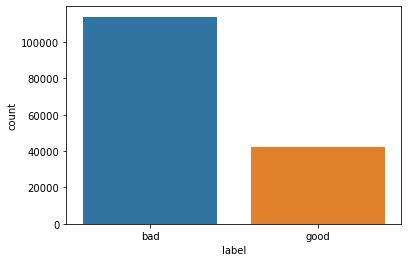

In [6]:
sns.countplot(x="label", data=data)

In [7]:
## shape of the dataset
print("Input data has {} rows and {} columns".format(data.shape[0], data.shape[1]))

Input data has 156060 rows and 2 columns


## Data Cleaning
#### Pre-processing text data

1. Remove punctuation
2. Tokenization
3. Remove stopwords
4. Lemmatize/Stem

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation]) # Remove punctuation
    tokens = re.split('\W+', text) # Tokenization
    text = [ps.stem(word) for word in tokens if word not in stopwords] # Remove stopwords
    return text

#### After text cleaning

In [10]:
sample = data.iloc[:5]
sample.loc[:, 'Phrase_clean'] = sample[['Phrase']].apply(lambda x: clean_text(x))
sample

,label,Phrase,Phrase_clean
0,bad,A series of escapades demonstrating the adage ...,NaN
1,bad,A series of escapades demonstrating the adage ...,NaN
2,bad,A series,NaN
3,bad,A,NaN
4,bad,series,NaN


#### Split into train/test

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['Phrase']], data['label'], test_size=0.2)

## Feature Engineering

#### Vectorize text

In [12]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text, max_features=1500)
tfidf_vect_fit = tfidf_vect.fit(X_train['Phrase'])

tfidf_train = tfidf_vect_fit.transform(X_train['Phrase'])
tfidf_test = tfidf_vect_fit.transform(X_test['Phrase'])

X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Building classifers

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [14]:
#### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='good', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

In [ ]:
### Feature importance
# reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Gradient Bossting

In [ ]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Further work:

1. PCA visulization
2. TF-IDF/bag of words/BERT
3. NN classifier